# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [23]:
import sys
!conda install --yes --prefix{sys.prefix} folium

usage: conda [-h] [-V] command ...
conda: error: unrecognized arguments: --prefix/opt/anaconda3/envs/tf2-1


In [121]:
!conda install --yes --prefix{sys.prefix} beautifulsoup

usage: conda [-h] [-V] command ...
conda: error: unrecognized arguments: --prefix/opt/anaconda3/envs/tf2-1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv('zillow_data.csv')
df1.head(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [26]:
df1['RegionName'].value_counts()

55324    1
74561    1
73538    1
31546    1
82070    1
        ..
75182    1
55343    1
1450     1
73129    1
65536    1
Name: RegionName, Length: 14723, dtype: int64

__Comments__\
Region name is the zipcode.
RegionID not relevant to the analysis.

In [3]:
df = pd.read_csv('Zillow_data/zhvi_all-homes_zipcode.csv')
df.head(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,233265.0,...,1248340.0,1234262.0,1229890.0,1226466.0,1208024.0,1182758.0,1150900.0,1134880.0,1120949.0,1112549.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,211748.0,...,494425.0,493485.0,492514.0,491726.0,491562.0,492618.0,494017.0,494766.0,494546.0,494435.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,245773.0,...,1161916.0,1153259.0,1156287.0,1175142.0,1193746.0,1205413.0,1203165.0,1209735.0,1211403.0,1212520.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30443 entries, 0 to 30442
Columns: 303 entries, RegionID to 2020-06-30
dtypes: float64(294), int64(3), object(6)
memory usage: 70.4+ MB


In [5]:
percent_zip_codes = str(round((30443/41702)*100,2))
print ('The data set includes ' + percent_zip_codes + '% of US zip codes')

The data set includes 73.0% of US zip codes


__Notes__
- Dropping Metro column because of missing values
- State and StateName are dupliates
- RegionID, RegionType not relevant

In [6]:
#rename RegionName to ZipCode
df.rename(columns={'RegionName': 'zipcode'}, inplace=True)
#drop RegionID
df.drop(columns=['RegionID', 'RegionType', 'StateName', 'SizeRank'], inplace=True)
df.head(2)

,zipcode,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
0,10025,NY,New York,New York-Newark-Jersey City,New York County,233265.0,231813.0,231891.0,231866.0,232396.0,...,1248340.0,1234262.0,1229890.0,1226466.0,1208024.0,1182758.0,1150900.0,1134880.0,1120949.0,1112549.0
1,60657,IL,Chicago,Chicago-Naperville-Elgin,Cook County,211748.0,211591.0,211180.0,211044.0,210477.0,...,494425.0,493485.0,492514.0,491726.0,491562.0,492618.0,494017.0,494766.0,494546.0,494435.0


In [7]:
def melt_data_monthly_mean(df):
    melted = pd.melt(df, id_vars=['zipcode', 'City', 'State', 'CountyName', 'Metro'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [8]:
melt_data_monthly_mean(df) #this is the mean price by month

,value
time,
1996-01-31,124979.207863
1996-02-29,124606.091938
1996-03-31,124543.916218
1996-04-30,124573.163709
1996-05-31,124632.428195
...,...
2020-02-29,227757.147127
2020-03-31,228465.291561
2020-04-30,229086.276320


In [9]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['zipcode', 'City', 'State', 'CountyName', 'Metro'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [10]:
df = melt_data(df)
df.head(2)

,zipcode,City,State,CountyName,Metro,time,value
0,10025,New York,NY,New York County,New York-Newark-Jersey City,1996-01-31,233265.0
1,60657,Chicago,IL,Cook County,Chicago-Naperville-Elgin,1996-01-31,211748.0


__Missing Values__
- the only column with missing values is the 'Metro' column, so it is reasonable to assume that these rows are not in a metro area. Missing values were replaced with 'rural'.

In [11]:
df.isna().sum()

zipcode             0
City                0
State               0
CountyName          0
Metro         1252330
time                0
value               0
dtype: int64

In [12]:
df.fillna('rural', inplace=True)

In [13]:
df.isna().sum()

zipcode       0
City          0
State         0
CountyName    0
Metro         0
time          0
value         0
dtype: int64

In [14]:
df.dtypes

zipcode                int64
City                  object
State                 object
CountyName            object
Metro                 object
time          datetime64[ns]
value                float64
dtype: object

In [15]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('<M8[ns]'), dtype('float64')],
      dtype=object)

In [16]:
df['value'] = df['value'].astype('int')

In [17]:
df.dtypes

zipcode                int64
City                  object
State                 object
CountyName            object
Metro                 object
time          datetime64[ns]
value                  int64
dtype: object

# Step 2: Data Preprocessing

In [18]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [19]:
get_datetimes(df)

ValueError: time data City doesn't match format specified

In [20]:
df_zips = df.groupby()

TypeError: You have to supply one of 'by' and 'level'

# Step 3: EDA and Visualization

__EDA Questions__
1. Which 3 zip codes had the most volatile prices?
2. Which 3 zip codes had the most stable prices?
3. Which zip codes are seeing price decay?
4. Which (if any) zip codes saw price growth during the 2008-2012 recession?
5. Which zip codes had stable prices during the 2008-2012 recession?
6. Which zip codes are priced the lowest?
7. Which zip codes are priced the highest?
8. How much higher, on average, are prices in metro areas?
9. What was the net change in overall median price from 2009-2019?
10. Which zip codes had a percent increase greater than inflation in the last year?

What do different regions look like?
Where was the top growth in the last 5 years, 10 years?

### 1. Which 3 zip codes had the most volatile prices?

In [21]:
df['value'].var()

31430008215.650566

In [22]:
zipcodes = list(df['zipcode'])

In [23]:
zip_10025 = df[df['zipcode'] == 10025]
zip_10025

,zipcode,City,State,CountyName,Metro,time,value
0,10025,New York,NY,New York County,New York-Newark-Jersey City,1996-01-31,233265
30443,10025,New York,NY,New York County,New York-Newark-Jersey City,1996-02-29,231813
60886,10025,New York,NY,New York County,New York-Newark-Jersey City,1996-03-31,231891
91329,10025,New York,NY,New York County,New York-Newark-Jersey City,1996-04-30,231866
121772,10025,New York,NY,New York County,New York-Newark-Jersey City,1996-05-31,232396
...,...,...,...,...,...,...,...
8798027,10025,New York,NY,New York County,New York-Newark-Jersey City,2020-02-29,1182758
8828470,10025,New York,NY,New York County,New York-Newark-Jersey City,2020-03-31,1150900
8858913,10025,New York,NY,New York County,New York-Newark-Jersey City,2020-04-30,1134880
8889356,10025,New York,NY,New York County,New York-Newark-Jersey City,2020-05-31,1120949


In [24]:
zip_10025['value'].var()

122704943383.83904

In [25]:
variances = df.groupby('zipcode')['value'].var()
type(variances)

pandas.core.series.Series

In [26]:
variances = variances.sort_values(ascending=True)
variances.nlargest(5)

zipcode
94027    2.604545e+12
90210    1.522078e+12
11962    1.264847e+12
90402    1.018843e+12
94301    9.265238e+11
Name: value, dtype: float64

In [27]:
variances.nsmallest(5)

zipcode
44506     65237.620000
40858    101003.118065
25204    123323.451049
40840    126020.532717
39150    129332.453654
Name: value, dtype: float64

In [28]:
variances.nsmallest(5).index

Int64Index([44506, 40858, 25204, 40840, 39150], dtype='int64', name='zipcode')

In [29]:
top_5_growth_zips=[43205, 30314, 30310, 30032, 19132]

In [30]:
for i in top_5_growth_zips:
    print(str(i), variances[i])

43205 1269584527.283091
30314 1989089102.6583064
30310 2693219155.767419
30032 1430183437.386454
19132 50938960.48153048


In [31]:
variances_df = variances.to_frame()
variances_df.describe()

,value
count,3.044300e+04
mean,4.111745e+09
std,2.966948e+10
min,6.523762e+04
25%,9.978353e+07
50%,3.598378e+08
75%,1.636492e+09
max,2.604545e+12


In [32]:
variances_by_county = df.groupby(['zipcode', 'CountyName'])['value'].var()
variances_by_county

zipcode  CountyName               
501      Suffolk County               5.920021e+07
602      Lee County                   1.389947e+08
604      Houston County               3.848033e+07
606      Newton County                1.929554e+07
610      Pike County                  1.023830e+08
                                          ...     
99827    Haines Borough               8.549884e+07
99833    Petersburg Borough           1.074995e+08
99835    Sitka Borough                3.021903e+09
99901    Ketchikan Gateway Borough    1.106422e+09
99929    Wrangell Borough             6.932992e+07
Name: value, Length: 30443, dtype: float64

### Looking at Growth over time

In [33]:
#filter dataframe by zipcode, then plot 
zip_83651 = df[df['zipcode'] == 83651]
zip_83651

,zipcode,City,State,CountyName,Metro,time,value
2012959,83651,Nampa,ID,Canyon County,Boise City,2001-07-31,99227
2043402,83651,Nampa,ID,Canyon County,Boise City,2001-08-31,98467
2073845,83651,Nampa,ID,Canyon County,Boise City,2001-09-30,98135
2104288,83651,Nampa,ID,Canyon County,Boise City,2001-10-31,97573
2134731,83651,Nampa,ID,Canyon County,Boise City,2001-11-30,97402
...,...,...,...,...,...,...,...
8801748,83651,Nampa,ID,Canyon County,Boise City,2020-02-29,236980
8832191,83651,Nampa,ID,Canyon County,Boise City,2020-03-31,238182
8862634,83651,Nampa,ID,Canyon County,Boise City,2020-04-30,239907
8893077,83651,Nampa,ID,Canyon County,Boise City,2020-05-31,242393


In [34]:
zip_83651 = zip_83651.set_index(pd.to_datetime(zip_83651['time']))
zip_83651 = zip_83651.resample('A').median()
zip_83651.drop(columns='zipcode', inplace=True)

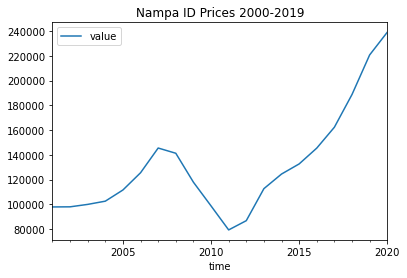

In [35]:
#zip_83651.index = pd.DateTimeIndex(zip_83651.index).to_period('A')

zip_83651.plot(title='Nampa ID Prices 2000-2019');


In [36]:
#calculate change over past 3 years
zip_83651 #this is the end of year value for this zip code each year

,value
time,
2001-12-31,97854.0
2002-12-31,97946.0
2003-12-31,99915.0
2004-12-31,102521.0
2005-12-31,111564.0
2006-12-31,125491.0
2007-12-31,145469.0
2008-12-31,141238.0
2009-12-31,117850.0


In [37]:
zip_83651['2016-12-31':'2016-12-31'].iloc[:1]

,value
time,
2016-12-31,145409.0


In [38]:
#calculate percent increase from 2016-2019

((zip_83651.iloc[18,0] - zip_83651.iloc[15,0])/zip_83651.iloc[15,0])*100

51.77396172176413

In [39]:
# calculate percent increase from 2016-2019 for all zips and find top 5

# first resample df to yearly data
#df = df.set_index(pd.to_datetime(df['time']))

df_yearly = df.resample('A').max()
df_yearly

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [40]:
# now add a column 

In [41]:
df.head()

,zipcode,City,State,CountyName,Metro,time,value
0,10025,New York,NY,New York County,New York-Newark-Jersey City,1996-01-31,233265
1,60657,Chicago,IL,Cook County,Chicago-Naperville-Elgin,1996-01-31,211748
2,10023,New York,NY,New York County,New York-Newark-Jersey City,1996-01-31,245773
3,77494,Katy,TX,Harris County,Houston-The Woodlands-Sugar Land,1996-01-31,200430
4,60614,Chicago,IL,Cook County,Chicago-Naperville-Elgin,1996-01-31,286382


In [42]:
top_5_growth_zips=['43205', '30314', '30310', '30032', '19132']

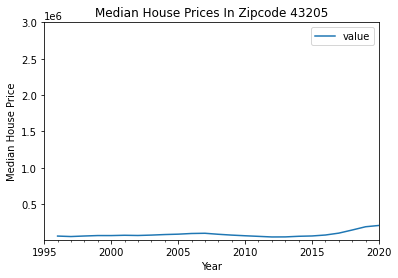

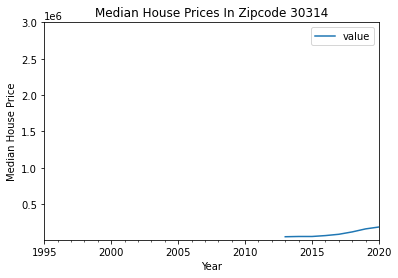

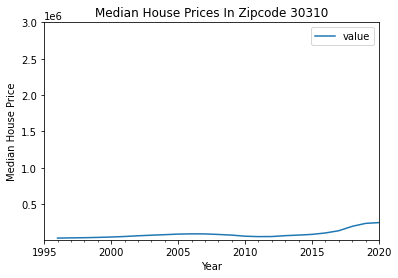

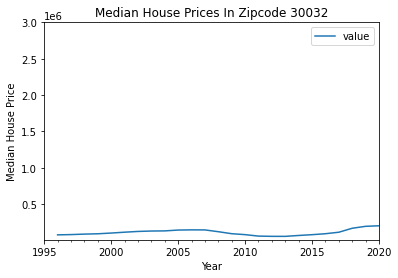

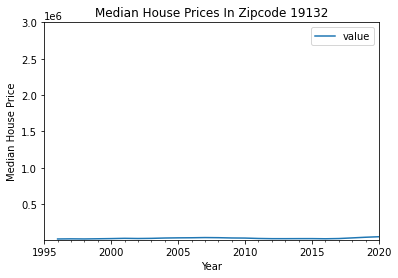

In [43]:
#plotting graphs of zips with most growth in the past 3 years

top_5_growth_zips=[43205, 30314, 30310, 30032, 19132]

def line_plot(list_of_zips):
    for z in list_of_zips:
        zip_frame = df[df['zipcode'] == z]
        zip_frame = zip_frame.set_index(pd.to_datetime(zip_frame['time']))
        zip_frame = zip_frame.resample('A').median()
        zip_frame.drop(columns='zipcode', inplace=True)
        zip_frame.plot(title= 'Median House Prices In Zipcode ' + str(z), xlabel='Year', 
                       ylabel='Median House Price', ylim=(10000, 3000000), xlim=(25, 50));
    
line_plot(top_5_growth_zips)

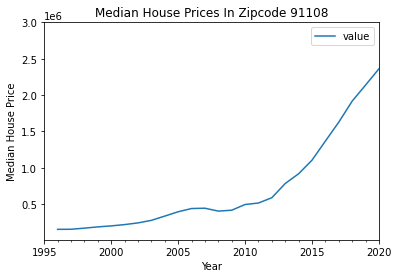

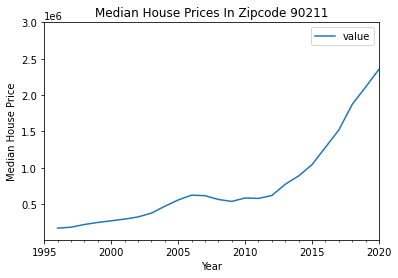

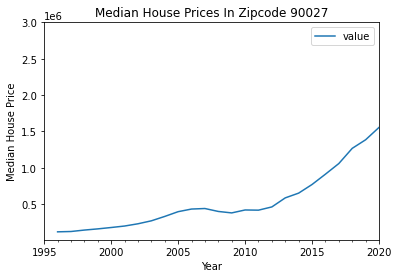

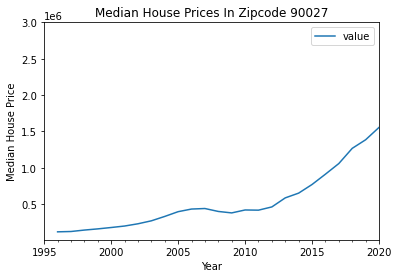

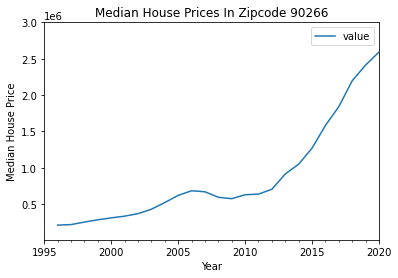

In [44]:
top_zips_24_yr = [91108, 90211, 90027, 90027, 90266]
line_plot(top_zips_24_yr)

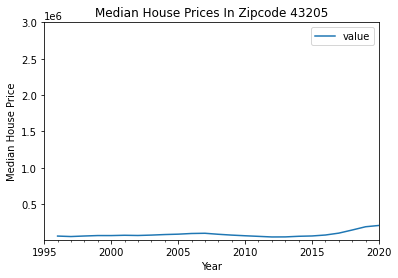

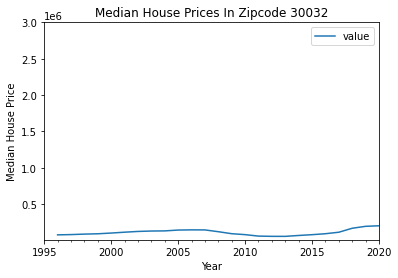

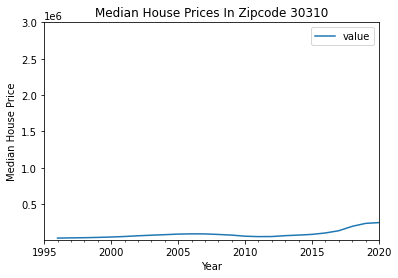

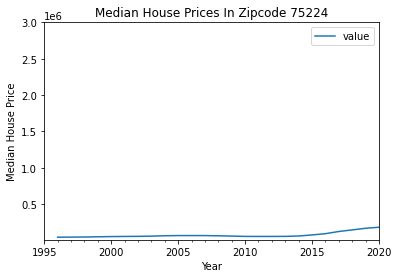

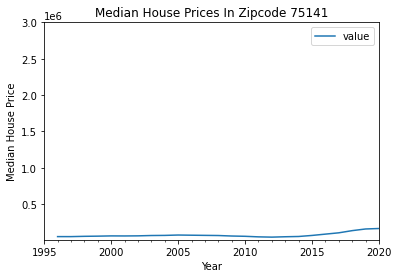

In [45]:
top_zips_5_yr = [43205, 30032, 30310, 75224, 75141]
line_plot(top_zips_5_yr)

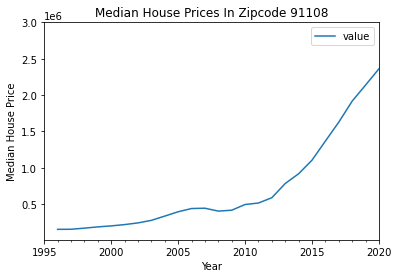

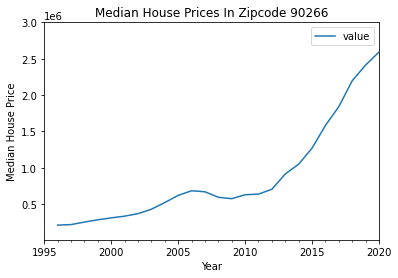

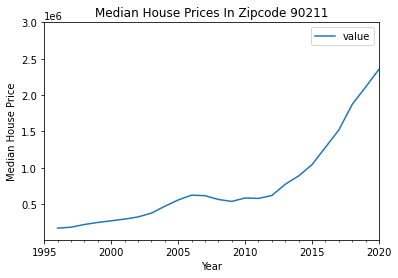

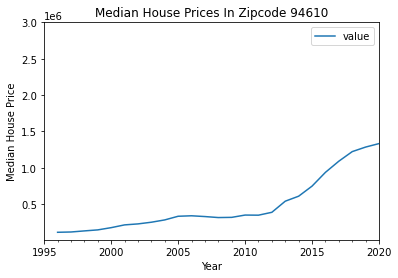

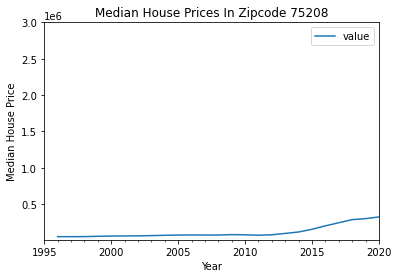

In [46]:
top_zips_10_yr = [91108, 90266, 90211, 94610, 75208]
line_plot(top_zips_10_yr)

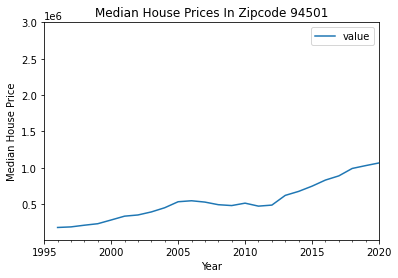

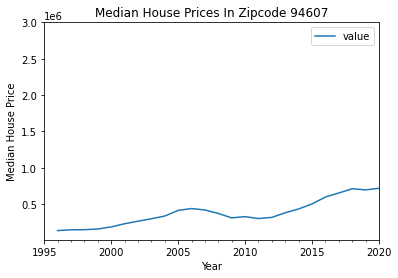

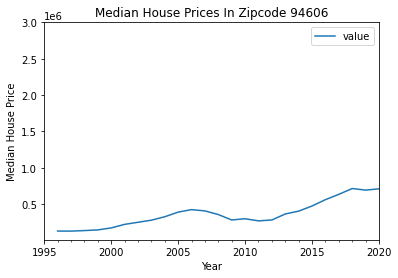

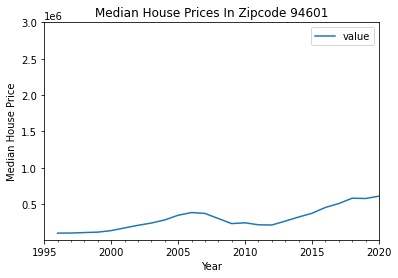

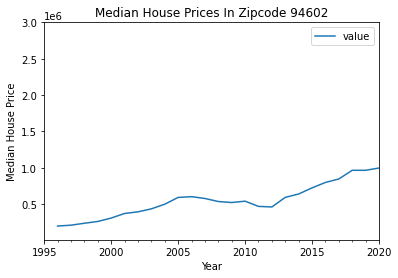

In [47]:
oakland_vicinity_zips = [94501, 94607, 94606, 94601, 94602]
line_plot(oakland_vicinity_zips)

In [48]:
df_oakland_vicinity = df[df['zipcode'].isin(oakland_vicinity_zips)]

In [49]:
def combined_plot(zips_list, dataframe):
    for i in range(len(zips_list)):
        dataframe.loc[dataframe['zipcode'] == zips_list[i]]['value'].plot(label=zips_list[i], figsize=(15,6))
        plt.legend

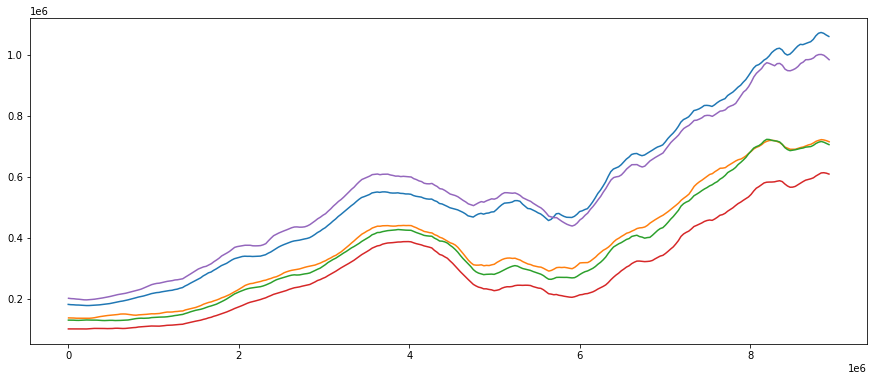

In [50]:
combined_plot(oakland_vicinity_zips, df_oakland_vicinity)

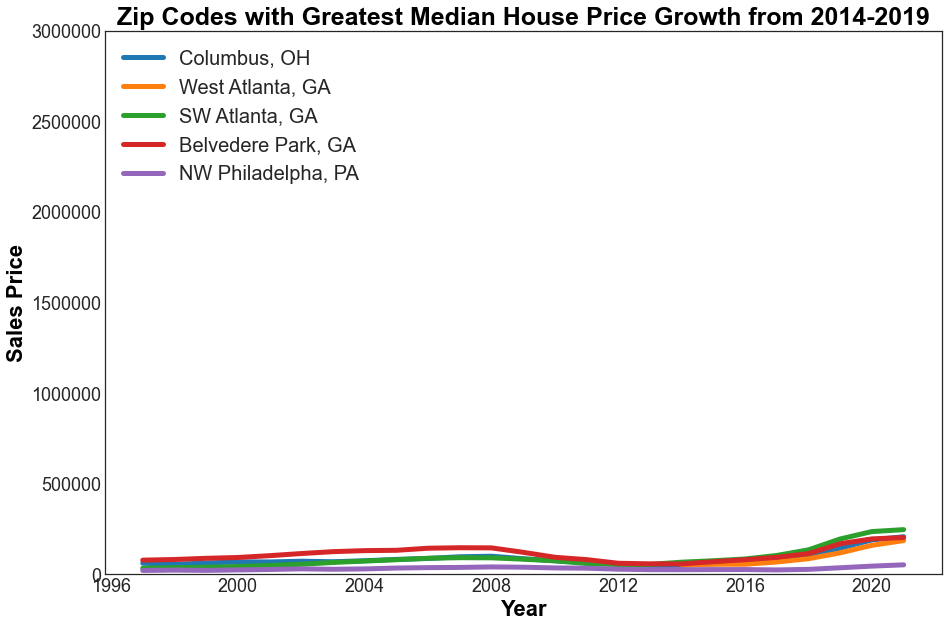

In [94]:
top_5_growth_zips=[43205, 30314, 30310, 30032, 19132]

top_5_labels = ['Columbus, OH', 'West Atlanta, GA', 'SW Atlanta, GA', 'Belvedere Park, GA', 'NW Philadelpha, PA']

title_5 = 'Zip Codes with Greatest Median House Price Growth from 2014-2019'



def line_plot_combined(list_of_zips, list_of_labels, title):
    frames = []
    for z in list_of_zips:
        zip_frame = df[df['zipcode'] == z]
        zip_frame = zip_frame.set_index(pd.to_datetime(zip_frame['time']))
        zip_frame = zip_frame.resample('A').median()
        zip_frame.drop(columns='zipcode', inplace=True)
        frames.append(zip_frame)
           
        font_title = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'bold',
        'size': 25,}
        
        font_med = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'bold',
        'size': 22,}
                
    for i in frames:
        plt.style.use('seaborn-white')
        plt.rcParams['figure.figsize']=(15,10)
        plt.plot(i, linewidth=5)
        plt.title(title, fontdict=font_title)
        plt.xlabel('Year', fontdict=font_med)
        plt.ylabel('Sales Price', fontdict=font_med)
        plt.ylim(0, 3000000)
        plt.legend(list_of_labels, loc='upper left', fontsize=20)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.ticklabel_format(axis='y', style='plain')
         
line_plot_combined(top_5_growth_zips, top_5_labels, title_5)

In [ ]:
# NOT USED
        small = 10
        med = 12
        large = 14

        plt.rc('font', size=small)          # controls default text sizes
        plt.rc('axes', titlesize=large)     # fontsize of the axes title
        plt.rc('axes', labelsize=large)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=small)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=small)    # fontsize of the tick labels
        plt.rc('legend', fontsize=med)    # legend fontsize
        plt.rc('figure', titlesize=large)  # fontsize of the figure title      

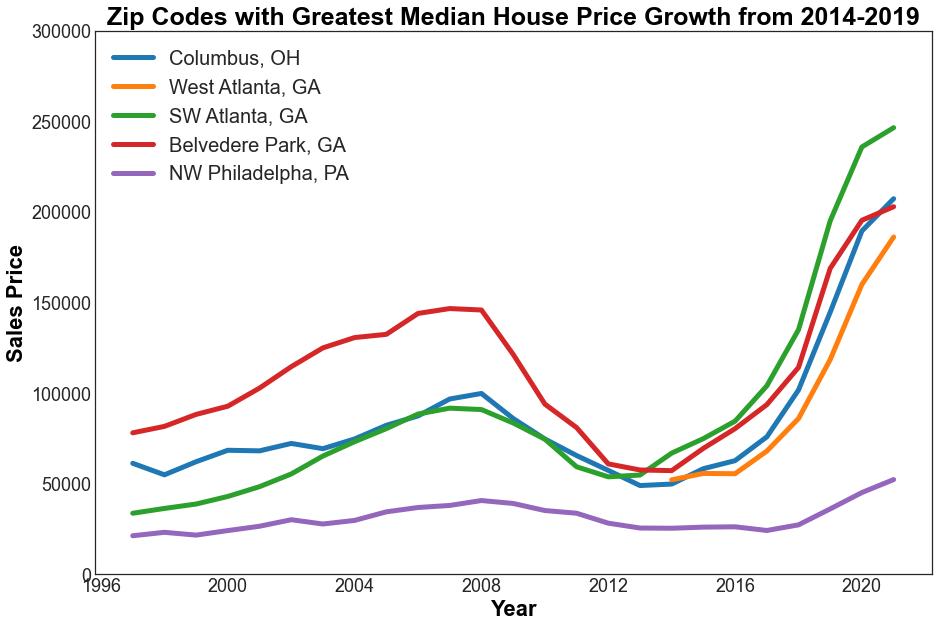

In [88]:
def line_plot_combined_low_value(list_of_zips, list_of_labels, title):
    frames = []
    for z in list_of_zips:
        zip_frame = df[df['zipcode'] == z]
        zip_frame = zip_frame.set_index(pd.to_datetime(zip_frame['time']))
        zip_frame = zip_frame.resample('A').median()
        zip_frame.drop(columns='zipcode', inplace=True)
        frames.append(zip_frame)

        
        font_title = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'bold',
        'size': 25,}
        
        font_med = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'bold',
        'size': 22,}
        
    for i in frames:
        plt.style.use('seaborn-white')
        plt.plot(i, linewidth=5)   
        plt.rcParams['figure.figsize']=(15,10)
        plt.title(title, fontdict=font_title)
        plt.xlabel('Year', fontdict=font_med)
        plt.ylabel('Sales Price', fontdict=font_med)
        plt.ylim(0, 300000)
        plt.legend(list_of_labels, loc='upper left', fontsize=20)        
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        
line_plot_combined_low_value(top_5_growth_zips, top_5_labels, title_5)

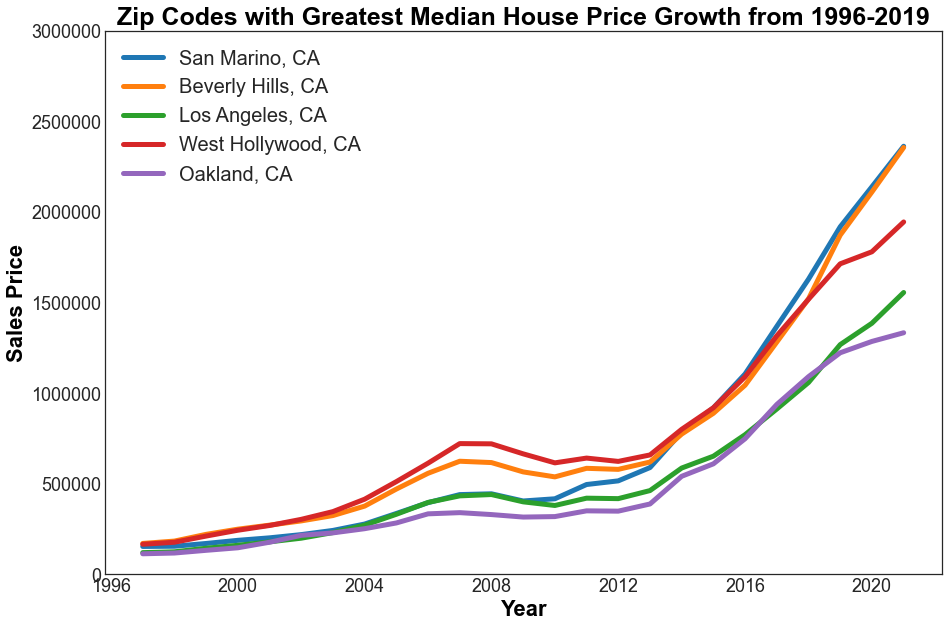

In [95]:
top_zips_24_yr = [91108, 90211, 90027, 90048, 94610]
top_24_labels = ['San Marino, CA', 'Beverly Hills, CA', 'Los Angeles, CA', 'West Hollywood, CA', 'Oakland, CA']
title_24 = 'Zip Codes with Greatest Median House Price Growth from 1996-2019'
line_plot_combined(top_zips_24_yr, top_24_labels, title_24)

### 2. Which 3 zip codes had the most stable prices?

In [78]:
# difference between the max and min

### 3. Which zip codes are seeing price decay over the last 5 years?

In [79]:
# make column with price at year t
df


# make column with price at year t-5

# make another column with difference

# sort dataframe by column value

,zipcode,City,State,CountyName,Metro,time,value
0,10025,New York,NY,New York County,New York-Newark-Jersey City,1996-01-31,233265
1,60657,Chicago,IL,Cook County,Chicago-Naperville-Elgin,1996-01-31,211748
2,10023,New York,NY,New York County,New York-Newark-Jersey City,1996-01-31,245773
3,77494,Katy,TX,Harris County,Houston-The Woodlands-Sugar Land,1996-01-31,200430
4,60614,Chicago,IL,Cook County,Chicago-Naperville-Elgin,1996-01-31,286382
...,...,...,...,...,...,...,...
8950237,27708,Durham,NC,Durham County,Durham-Chapel Hill,2020-06-30,215287
8950238,72630,Diamond City,AR,Boone County,Harrison,2020-06-30,120135
8950239,1470,Groton,MA,Middlesex County,Boston-Cambridge-Newton,2020-06-30,397763
8950240,820,Choudrant,LA,Lincoln Parish,Ruston,2020-06-30,109318


### 4. Which (if any) zip codes saw price growth during the 2008-2012 recession?

### 5. Which zip codes had the least decline during the 2008-2012 recession?

In [81]:
#Filter to only show the 2 months we want
df_filt = df[['zipcode', 'time', 'value']]
df_filt = df_filt.loc[(df_filt['time'].dt.year == 2008) | (df_filt['time'].dt.year == 2009)]
df_filt = df_filt.loc[(df_filt['time'].dt.month == 12)]

#Create smaller dfs, one for 2008 and one for 2009.
df08 = df_filt.loc[(df_filt['time'].dt.year == 2008)]

df09 = df_filt.loc[(df_filt['time'].dt.year == 2009)]


#Merge together with value columns renamed after month
df08['val_2008'] = df08['value']
df08.drop(['value', 'time'], axis=1, inplace=True)

df09['val_2009'] = df09['value']
df09.drop(['value', 'time'], axis=1, inplace=True)

decline_df = df08.merge(df09, how='inner', on='zipcode')

decline_df['percent_growth'] = (decline_df['val_2009'] - decline_df['val_2008']) / decline_df['val_2008'] * 100
decline_df.sort_values(by='percent_growth', ascending=False)

/opt/anaconda3/envs/tf2-1/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/anaconda3/envs/tf2-1/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/envs/tf2-1/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,zipcode,val_2008,val_2009,percent_growth
10667,35748,124247,156774,26.179304
25721,40058,68005,85450,25.652526
22497,41527,64430,79394,23.225206
18548,604,18826,23023,22.293636
17613,94020,716342,871843,21.707648
...,...,...,...,...
2173,89102,187852,127972,-31.876158
145,89108,158547,106848,-32.607996
2103,89104,149301,99364,-33.447197
8677,33972,131451,87416,-33.499175


In [82]:
no_decline = decline_df['percent_growth'] >= 0
no_decline_08_09 = decline_df[no_decline]
no_decline_08_09.sort_values(by='percent_growth', ascending=False)

,zipcode,val_2008,val_2009,percent_growth
10667,35748,124247,156774,26.179304
25721,40058,68005,85450,25.652526
22497,41527,64430,79394,23.225206
18548,604,18826,23023,22.293636
17613,94020,716342,871843,21.707648
...,...,...,...,...
4699,80922,213745,213758,0.006082
24260,98641,165171,165177,0.003633
10633,52742,137156,137158,0.001458
14784,75681,82658,82659,0.001210


In [84]:
fifteen_percent_club = decline_df['percent_growth'] >= 15
fifteen_percent_08_09  = decline_df[fifteen_percent_club]
fifteen_percent_08_09.sort_values(by='percent_growth', ascending=False)

,zipcode,val_2008,val_2009,percent_growth
10667,35748,124247,156774,26.179304
25721,40058,68005,85450,25.652526
22497,41527,64430,79394,23.225206
18548,604,18826,23023,22.293636
17613,94020,716342,871843,21.707648
22740,24924,51564,62623,21.447134
15513,54437,69548,84214,21.087594
20278,95227,280481,338481,20.678763
22615,48139,94176,113224,20.225960
11316,75226,71894,86268,19.993324


In [85]:
fifteen_percent_growth_zips = list(fifteen_percent_08_09['zipcode'])
len(fifteen_percent_growth_zips)

47

In [ ]:
fifteen_percent_growth_zips.remove(604)
fifteen_percent_growth_zips.remove(5768)

In [117]:
len(fifteen_percent_growth_zips)

45

In [86]:
import pgeocode

nomi = pgeocode.Nominatim('us')
a = nomi.query_postal_code('35748')
a['latitude']

34.714

In [87]:
a['longitude']

-86.39399999999998

In [113]:
fifteen_percent_dict = {}

for i in fifteen_percent_growth_zips:
    query = nomi.query_postal_code(i)
    fifteen_percent_dict.update( {i:(query['latitude'], query['longitude'])} )
    
fifteen_percent_dict

{73099: (35.4977, -97.7323),
 70122: (30.0056, -90.0644),
 39301: (32.3574, -88.656),
 73064: (35.3885, -97.7309),
 88081: (32.2239, -106.2631),
 91108: (34.1207, -118.1117),
 39202: (32.3149, -90.1782),
 35748: (34.714, -86.39399999999998),
 63334: (39.3346, -91.1962),
 75226: (32.7887, -96.7676),
 25601: (37.8487, -81.9935),
 75207: (32.7939, -96.8319),
 39335: (32.5022, -88.4956),
 76487: (32.968, -97.8472),
 54437: (44.7404, -90.6229),
 48417: (43.2404, -83.9511),
 94020: (37.2726, -122.2495),
 25517: (38.1321, -82.4183),
 41557: (37.4935, -82.4221),
 39320: (32.4676, -88.7228),
 72167: (34.4508, -92.6547),
 70740: (30.3879, -91.4383),
 95227: (38.1929, -121.0811),
 16854: (40.8935, -77.4733),
 41645: (37.5381, -82.7976),
 49818: (45.9104, -87.2237),
 73090: (35.3913, -97.9398),
 95563: (40.8558, -123.573),
 41527: (37.6432, -82.2991),
 48139: (42.4523, -83.8147),
 24924: (38.186, -80.1345),
 15031: (40.3547, -80.1669),
 26263: (38.9489, -79.4376),
 28325: (35.1538, -78.1053),
 880

In [89]:
import folium
map = folium.Map(location=[35.4977, -97.7323])
map

In [114]:
fifteen_percent_coords = []

for i in fifteen_percent_growth_zips:
    query = nomi.query_postal_code(i)
    fifteen_percent_coords.append((query['latitude'], query['longitude']))
    
fifteen_percent_coords

[(35.4977, -97.7323),
 (30.0056, -90.0644),
 (32.3574, -88.656),
 (35.3885, -97.7309),
 (32.2239, -106.2631),
 (34.1207, -118.1117),
 (32.3149, -90.1782),
 (34.714, -86.39399999999998),
 (39.3346, -91.1962),
 (32.7887, -96.7676),
 (37.8487, -81.9935),
 (32.7939, -96.8319),
 (32.5022, -88.4956),
 (32.968, -97.8472),
 (44.7404, -90.6229),
 (43.2404, -83.9511),
 (37.2726, -122.2495),
 (38.1321, -82.4183),
 (37.4935, -82.4221),
 (32.4676, -88.7228),
 (34.4508, -92.6547),
 (30.3879, -91.4383),
 (38.1929, -121.0811),
 (40.8935, -77.4733),
 (37.5381, -82.7976),
 (45.9104, -87.2237),
 (35.3913, -97.9398),
 (40.8558, -123.573),
 (37.6432, -82.2991),
 (42.4523, -83.8147),
 (38.186, -80.1345),
 (40.3547, -80.1669),
 (38.9489, -79.4376),
 (35.1538, -78.1053),
 (32.0682, -106.631),
 (43.2226, -93.9109),
 (48.15600000000001, -93.7296),
 (40.6137, -123.4488),
 (38.7497, -78.9974),
 (42.1254, -94.7754),
 (40.74800000000001, -123.229),
 (37.2032, -119.2492),
 (43.1851, -78.9837),
 (46.6667, -96.7398),


In [99]:
fifteen_percent_coords[0][1]

-97.7323

In [102]:
folium.Marker(location=[35.4977, -97.7323]).add_to(map)
map

In [107]:
for i in fifteen_percent_coords:
    print(i[0], i[1])

35.4977 -97.7323
30.0056 -90.0644
32.3574 -88.656
35.3885 -97.7309
32.2239 -106.2631
34.1207 -118.1117
32.3149 -90.1782
34.714 -86.39399999999998
39.3346 -91.1962
32.7887 -96.7676
37.8487 -81.9935
32.7939 -96.8319
32.5022 -88.4956
32.968 -97.8472
44.7404 -90.6229
43.2404 -83.9511
37.2726 -122.2495
38.1321 -82.4183
37.4935 -82.4221
32.4676 -88.7228
34.4508 -92.6547
nan nan
30.3879 -91.4383
38.1929 -121.0811
40.8935 -77.4733
37.5381 -82.7976
45.9104 -87.2237
35.3913 -97.9398
40.8558 -123.573
37.6432 -82.2991
42.4523 -83.8147
38.186 -80.1345
40.3547 -80.1669
38.9489 -79.4376
35.1538 -78.1053
32.0682 -106.631
43.2226 -93.9109
48.15600000000001 -93.7296
40.6137 -123.4488
38.7497 -78.9974
42.1254 -94.7754
40.74800000000001 -123.229
37.2032 -119.2492
nan nan
43.1851 -78.9837
46.6667 -96.7398
38.4941 -85.1242


In [116]:
for i in fifteen_percent_coords:
    folium.Marker(location=[i[0], i[1]]).add_to(map)
map

#### Mapping Zipcodes with Geojson

In [120]:
import json 

with open('Geojson/ca_california_zip_codes_geo.min.json') as jsonFile:
    data = json.load(jsonFile)

    

JSONDecodeError: Expecting value: line 6 column 1 (char 5)

#### Bar Graph with 2020 % Increase By Region

In [124]:
from bs4 import BeautifulSoup
import requests

In [ ]:
# DONT RUN

#make get request from url
url = 'https://www.fhfa.gov/DataTools/Tools/Pages/FHFA-HPI-Top-100-Metro-Area-Rankings.aspx'
html_content = requests.get(url).text

#parse the html content

soup = BeautifulSoup(html_content, 'html.parser')
print(soup.prettify())

In [130]:
df_metros = pd.read_excel('FHFA/HPI_EXP_metro.xls')
df_metros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        5850 non-null   int64  
 1   metro_name  5850 non-null   object 
 2   yr          5850 non-null   int64  
 3   qtr         5850 non-null   int64  
 4   index_nsa   5850 non-null   float64
 5   index_sa    5850 non-null   float64
 6   note        846 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 320.0+ KB


In [ ]:
Pacific = {} # WA, OR, CA, NV
Fronteir = {} #MT, ID, UT, CO, AZ, NM, OK
Midwest = {} #WI, MI, IN, OH, MN, IL, ND, SD, NB, IA, KS, MO
Mid_Atlantic = {} #MD, VA
Northeast = {} #CT, DE, ME, MA, NH, NJ, NY, PA, RI, VT
Southeast = {} #AL, FL, GA, NC 
Deep South = {} #GA, AL, SC, MI, LA, AK, 
Appalachia = {} # WV, KT, TN

In [ ]:
Pacific_states = [WA, OR, CA, NV]
Fronteir_states  = [MT, ID, UT, CO, AZ, NM, OK]
Midwest_states  = [WI, MI, IN, OH, MN, IL, ND, SD, NB, IA, KS, MO]
Mid_Atlantic_states  = [MD, VA]
Northeast_states  = [CT, DE, ME, MA, NH, NJ, NY, PA, RI, VT]
Southeast_states  = [AL, FL, GA, NC ]
Deep South_states  = [GA, AL, SC, MI, LA, AK] 
Appalachia_states  = [WV, KT, TN]

In [198]:
# Percent growth by state from 2010-2019 
# https://thestacker.com/stories/3677/states-hottest-real-estate-markets-over-last-10-years
# note vermont is missing from northeast

Pacific = {'WA':55.6, 'OR':53.6, 'CA':66.5, 'NV':92.1}
West = {'MT':35.0, 'ID':67.0, 'UT':56.8, 'CO':75.9, 'AZ':64.2, 'NM':12.6, 'OK':27.7, 'WY':30.2, 'TX': 52.1}
Southeast = {'AL':27.9, 'FL':65.6, 'GA':41.9, 'NC':28.9}
Midwest = {'WI':23.2, 'MI':71.8, 'IN':36.1, 'OH':28.9, 'MN':38.3, 'IL':10.7, 'ND':48.4, 'SD':38.2, 
           'NB':43.8, 'IA':33.7, 'KS':22.6, 'MO':25.0}
Appalachia = {'WV':22.8, 'KT':28.4, 'TN':42.1}
Non_Continential = {'AK': 14.2, 'HI':43.0}
Deep_South = {'SC':27.9, 'MI':20.0, 'LA':9.4, 'AK':28.6} 
Northeast = {'CT':0.6, 'DE':8.7, 'ME':35.1, 'MA':37.0, 'NH':28.5, 'NJ':7.3, 'NY':17.6, 'PA':19.2, 'RI':27.4}
Mid_Atlantic = {'MD':12.7, 'VA':14.8}

In [228]:
regions = [Pacific, West, Southeast, Midwest, Appalachia, Non_Continential, Deep_South, Northeast, Mid_Atlantic]
region_names = ['Pacific', 'West', 'Southeast', 'Midwest', 'Appalachia', 'Non-Continential', 'Deep South',  'Northeast', 'Mid-Atlantic']

In [229]:
mean_growth_by_region = []

for i in regions:
    mean_growth_by_region.append (sum(list(i.values())) /len(i))
    
mean_growth_by_region

[66.94999999999999,
 46.83333333333334,
 41.075,
 35.05833333333333,
 31.100000000000005,
 28.6,
 21.475,
 20.155555555555555,
 13.75]

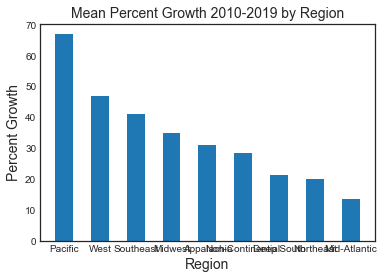

In [230]:
plt.bar(region_names, height = mean_growth_by_region, width=0.5)
plt.title('Mean Percent Growth 2010-2019 by Region')
plt.xlabel('Region')
plt.ylabel('Percent Growth');

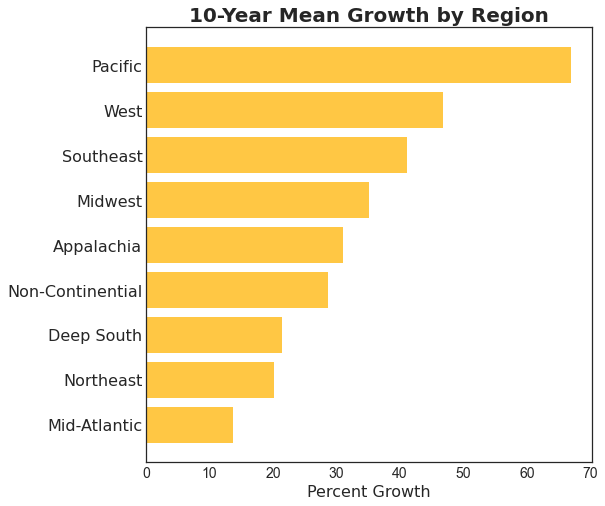

In [231]:


y_pos = np.arange(len(mean_growth_by_region))

fig, ax = plt.subplots(figsize=(8,8))

font_med = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 16}

font_lg = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}



ax.barh(y_pos,mean_growth_by_region, align='center', color='#ffc744')
ax.set_yticks(y_pos)
plt.xticks(fontsize=14)
ax.set_yticklabels(region_names, fontdict=font_med)
ax.invert_yaxis()
ax.set_xlabel('Percent Growth', fontdict=font_med)
ax.set_title('10-Year Mean Growth by Region', fontdict=font_lg);


#ax.set_xticklabels(fontdict=font_med)

AttributeError: 'list' object has no attribute 'plot'

In [131]:
df_metros.head(5)

,city,metro_name,yr,qtr,index_nsa,index_sa,note
0,11244,"Anaheim-Santa Ana-Irvine, CA (MSAD)",1991,1,100.00,100.00,NaN
1,11244,"Anaheim-Santa Ana-Irvine, CA (MSAD)",1991,2,100.55,99.95,NaN
2,11244,"Anaheim-Santa Ana-Irvine, CA (MSAD)",1991,3,100.81,99.51,NaN
3,11244,"Anaheim-Santa Ana-Irvine, CA (MSAD)",1991,4,99.81,99.16,NaN
4,11244,"Anaheim-Santa Ana-Irvine, CA (MSAD)",1992,1,99.23,99.24,NaN


In [ ]:
if CA is in df_metros['metro_name']:
    

### 6. Which zip codes are priced the lowest?

In [69]:
df_zips =df.groupby(['zipcode']).median()  #KEEP
df_zips.head(3)

,value
zipcode,
501,77913.5
602,102541.0
604,27281.0


In [70]:
smallest_3_zips = df_zips.nsmallest(3, ['value'])
smallest_3_zips

,value
zipcode,
72123,10053.5
72036,13501.0
24724,14016.0


In [72]:
smallest_3_cities = list(smallest_3_zips.iloc[0:3,]['value'])
smallest_3_cities

[10053.5, 13501.0, 14016.0]

Text(0.5, 1.0, 'Zip Codes with the Lowest Home Values')

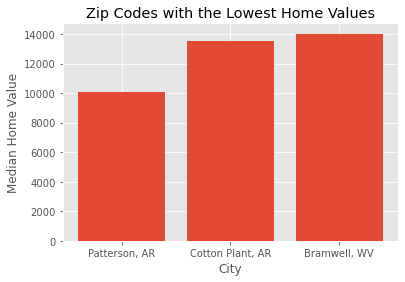

In [74]:
smallest_3_city_names = ['Patterson, AR', 'Cotton Plant, AR', 'Bramwell, WV']

plt.style.use('ggplot')
plt.bar(smallest_3_city_names, smallest_3_cities)
plt.xlabel('City')
plt.ylabel('Median Home Value')
plt.title('Zip Codes with the Lowest Home Values')

### 7. Which zip codes are priced the highest?

In [67]:
top_3 = df.nlargest(3, ['value'])
top_3

,zipcode,City,State,CountyName,Metro,time,value
8840789,94027,Atherton,CA,San Mateo County,San Francisco-Oakland-Hayward,2020-03-31,6518578
8871232,94027,Atherton,CA,San Mateo County,San Francisco-Oakland-Hayward,2020-04-30,6515411
8810346,94027,Atherton,CA,San Mateo County,San Francisco-Oakland-Hayward,2020-02-29,6459116


In [68]:
top_3_zips = df_zips.nlargest(3, ['value'])
top_3_zips

,value
zipcode,
10118,3413948.5
11962,3145932.5
33109,2434576.5


In [85]:
top_3_cities = list(top_3_zips.iloc[0:3,]['value'])
top_3_cities

[3413948.5, 3145932.5, 2434576.5]

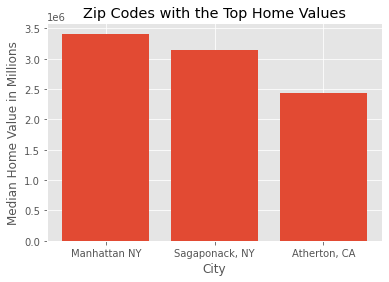

In [98]:
top_3_city_names = ['Manhattan NY', 'Sagaponack, NY',  'Atherton, CA']

plt.style.use('ggplot')
plt.bar(top_3_city_names, top_3_cities)
plt.xlabel('City')
plt.ylabel('Median Home Value in Millions')
plt.title('Zip Codes with the Top Home Values');

#plt.ticklabel_format(style='plain')

In [ ]:
### 8. How much higher, on average, are prices in metro areas?

In [ ]:
### 9. What was the net change in overall median price from 2009-2019?

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [ ]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results